In [16]:
import networkx as nx
import numpy as np
import qiskit

import arquin

# Modules

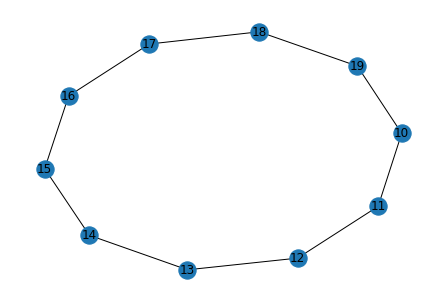

In [2]:
qubits = np.arange(10, 20)
ring = arquin.ring.RingModule(qubits)
nx.draw_spring(ring.module_graph, with_labels=True)

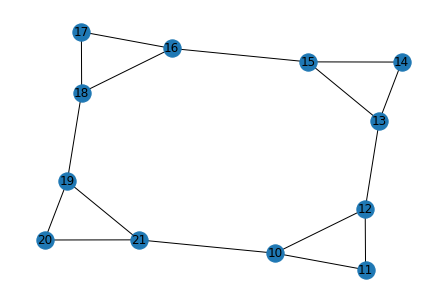

In [3]:
qubits = np.arange(10, 22)
ring = arquin.ring_and_chord.RingAndChordModule(qubits, offset=2)
nx.draw_spring(ring.module_graph, with_labels=True)

# Devices

4
[6, 6, 6, 6]
{(0, 1): (3, 6), (1, 2): (9, 12), (2, 3): (15, 18), (3, 0): (21, 0)}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
24


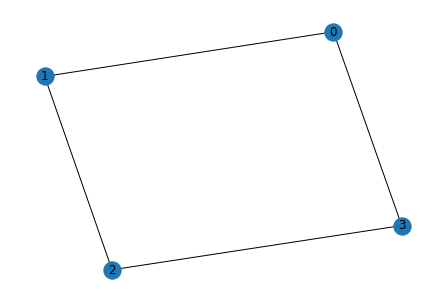

In [6]:
loop = arquin.loop.Loop(4, 6, module_offset=1)
print(len(loop.modules))
print(loop.module_sizes)
print(loop.global_edges)
print(loop.get_qubits())
print(len(loop.get_qubits()))
nx.draw_spring(loop.device_graph, with_labels=True)

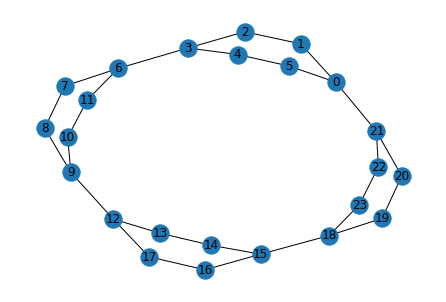

In [7]:
nx.draw_spring(loop.get_qubit_graph(), with_labels=True)

# Distributed Compilation

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


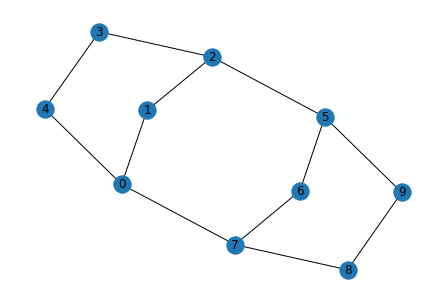

In [15]:
simple_device = arquin.loop.Loop(2, 5, module_offset=1)
print(simple_device.get_qubits())
nx.draw(simple_device.get_qubit_graph(), with_labels=True)

In [19]:
ghz_circuit = qiskit.QuantumCircuit(len(simple_device.get_qubits()))
ghz_circuit.h(0)
for i in range(ghz_circuit.num_qubits - 1):
    ghz_circuit.cx(i, i+1)
ghz_circuit.measure_all()
ghz_circuit.draw()

┌───┐                                              ░ ┌─┐            »
    q_0: ┤ H ├──■───────────────────────────────────────────░─┤M├────────────»
         └───┘┌─┴─┐                                         ░ └╥┘┌─┐         »
    q_1: ─────┤ X ├──■──────────────────────────────────────░──╫─┤M├─────────»
              └───┘┌─┴─┐                                    ░  ║ └╥┘┌─┐      »
    q_2: ──────────┤ X ├──■─────────────────────────────────░──╫──╫─┤M├──────»
                   └───┘┌─┴─┐                               ░  ║  ║ └╥┘┌─┐   »
    q_3: ───────────────┤ X ├──■────────────────────────────░──╫──╫──╫─┤M├───»
                        └───┘┌─┴─┐                          ░  ║  ║  ║ └╥┘┌─┐»
    q_4: ────────────────────┤ X ├──■───────────────────────░──╫──╫──╫──╫─┤M├»
                             └───┘┌─┴─┐                     ░  ║  ║  ║  ║ └╥┘»
    q_5: ─────────────────────────┤ X ├──■──────────────────░──╫──╫──╫──╫──╫─»
                                  └───┘┌─┴─┐                ░  ║  ║  ║  ║  ║ »
    q_6: ──────────────────────────────┤ X ├──■─────────────░──╫──╫──╫──╫──╫─»
                                       └───┘┌─┴─┐           ░  ║  ║  ║  ║  ║ »
    q_7: ───────────────────────────────────┤ X ├──■────────░──╫──╫──╫──╫──╫─»
                                            └───┘┌─┴─┐      ░  ║  ║  ║  ║  ║ »
    q_8: ────────────────────────────────────────┤ X ├──■───░──╫──╫──╫──╫──╫─»
                                                 └───┘┌─┴─┐ ░  ║  ║  ║  ║  ║ »
    q_9: ─────────────────────────────────────────────┤ X ├─░──╫──╫──╫──╫──╫─»
                                                      └───┘ ░  ║  ║  ║  ║  ║ »
meas: 10/══════════════════════════════════════════════════════╩══╩══╩══╩══╩═»
                                                               0  1  2  3  4 »
«                        
«    q_0: ───────────────
«                        
«    q_1: ───────────────
«                        
«    q_2: ───────────────
«                        
«    q_3: ───────────────
«                        
«    q_4: ───────────────
«         ┌─┐            
«    q_5: ┤M├────────────
«         └╥┘┌─┐         
«    q_6: ─╫─┤M├─────────
«          ║ └╥┘┌─┐      
«    q_7: ─╫──╫─┤M├──────
«          ║  ║ └╥┘┌─┐   
«    q_8: ─╫──╫──╫─┤M├───
«          ║  ║  ║ └╥┘┌─┐
«    q_9: ─╫──╫──╫──╫─┤M├
«          ║  ║  ║  ║ └╥┘
«meas: 10/═╩══╩══╩══╩══╩═
«          5  6  7  8  9

In [20]:
modcom = arquin.modular_compiler.ModularCompiler(ghz_circuit, 'GHZ', simple_device, 'LoopDevice')

In [21]:
modcom.run()

AttributeError: 'Loop' object has no attribute 'abstract_inter_edges'

In [ ]:
arquin.converters.edges_to_source_graph(